In [32]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Evaluation of Test Results from Model Training
Output ``.csv`` files contain all feature variables, the true temperature and a list of the predicted temperatures quantiles ``[5%, 50%, 95%]``. The output does not, however, contain the station names form which the features originate.

In [33]:
outputpath = 'S:/pools/t/T-IDP-Projekte-u-Vorlesungen/Meteoblue/QRF/Data/QRF Testing/mb4_run4.csv'
outputfile = pd.read_csv(outputpath, delimiter=',')
outputfile['datetime'] = pd.to_datetime(outputfile['datetime'])
outputfile.columns

Index(['datetime', 'altitude', 'buildings', 'buildings_10', 'buildings_30',
       'buildings_100', 'buildings_200', 'buildings_500', 'forests',
       'forests_10', 'forests_30', 'forests_100', 'forests_200', 'forests_500',
       'pavedsurfaces', 'pavedsurfaces_10', 'pavedsurfaces_30',
       'pavedsurfaces_100', 'pavedsurfaces_200', 'pavedsurfaces_500',
       'surfacewater', 'surfacewater_10', 'surfacewater_30',
       'surfacewater_100', 'surfacewater_200', 'surfacewater_500',
       'urbangreen', 'urbangreen_10', 'urbangreen_30', 'urbangreen_100',
       'urbangreen_200', 'urbangreen_500', 'humidity', 'irradiation',
       'moving_average', 'Prediction', 'True Temperature', 'stationid'],
      dtype='object')

In [43]:
def make_lists(x):
    """ Comes in the form [val1 val2 val3] and must be converted to a list with floats"""
    vals = x.replace('[','').replace(']','')
    vals = ' '.join(vals.split())
    vals = vals.split(' ')

    return [float(val) for val in vals]

def extract_prediction(x: pd.DataFrame):
    """ Extracts the prediction and upper / lower confidence intervals from the prediction list"""
    preds = []
    uCI = []
    lCI = []
    for row in range(len(x)):
        lCI.append(x['Prediction'].iloc[row][0])
        preds.append(x['Prediction'].iloc[row][1])
        uCI.append(x['Prediction'].iloc[row][2])
    return preds, uCI, lCI
        

outputfile['Prediction'] = outputfile['Prediction'].apply(make_lists)
outputfile['Predicted Temperature'], outputfile['Upper Boundary'], outputfile['Lower Boundary'] = extract_prediction(outputfile)

In [44]:
outputfile.head()

,datetime,altitude,buildings,buildings_10,buildings_30,buildings_100,buildings_200,buildings_500,forests,forests_10,...,irradiation,moving_average,Prediction,True Temperature,stationid,pred,Error,Predicted Temperature,Upper Boundary,Lower Boundary
0,2019-06-27 03:30:00,398.765228,0.0,0.197985,0.028512,2.685998e-03,6.781977e-04,1.091624e-04,0.0,0.0,...,0.000000,23.461429,"[22.87, 23.13, 23.63263789]",23.75,C0B425A3EF9E,23.130000,0.620000,23.130000,23.632638,22.870000
1,2019-06-27 11:30:00,406.484528,0.0,0.002061,0.001274,1.200159e-04,3.030326e-05,4.877597e-06,0.0,0.0,...,799.079575,33.121429,"[31.28024351, 32.7, 34.4161]",33.85,DA522D0B21C6,32.700000,1.150000,32.700000,34.416100,31.280244
2,2019-06-27 18:40:00,456.037933,0.0,0.000000,0.000000,4.270069e-26,1.078166e-26,1.735410e-27,0.0,0.0,...,785.809309,34.772857,"[33.02, 34.22212725, 35.49]",34.51,EA7F85FA9668,34.222127,0.287873,34.222127,35.490000,33.020000
3,2019-06-27 11:30:00,431.223236,0.0,0.000000,0.000003,2.835518e-07,7.159506e-08,1.152391e-08,0.0,0.0,...,799.251907,32.431429,"[31.12, 32.43, 34.24112964]",32.91,C32A342622CC,32.430000,0.480000,32.430000,34.241130,31.120000
4,2019-06-27 07:40:00,406.537048,0.0,0.000000,0.000000,1.765220e-11,4.457071e-12,7.174080e-13,0.0,0.0,...,74.142184,21.991429,"[22.68, 23.1, 24.68]",22.82,CC64BEFD117A,23.100000,-0.280000,23.100000,24.680000,22.680000


Scatterplot of the predicted and true temperatures

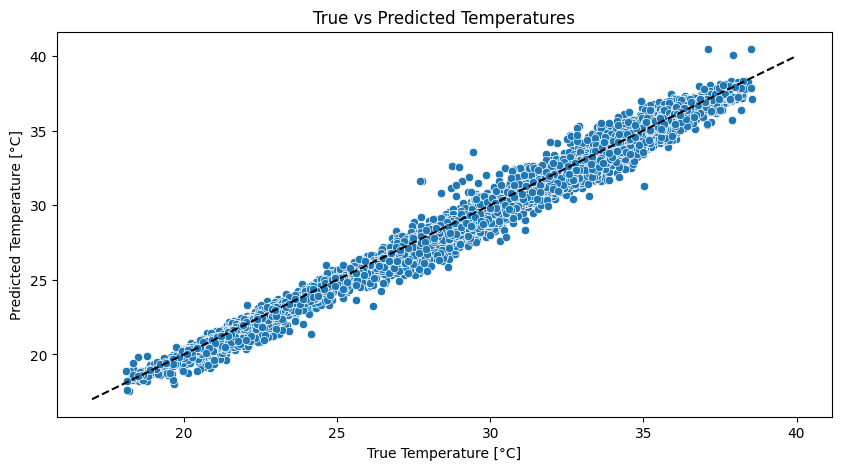

In [36]:
ax, fig = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(data=outputfile, x='True Temperature', y='Predicted Temperature')
ax.set(xlabel='True Temperature [°C]', ylabel='Predicted Temperature [°C]', title='True vs Predicted Temperatures')
# 45° line
ax.plot([17, 40], [17, 40], color='black', linestyle='--')

### Error Metrics

In [42]:
outputfile['Error'] = outputfile['True Temperature'] - outputfile['Predicted Temperature']
rmse = np.sqrt(np.mean(outputfile['Error']**2))
print(f'RMSE: {rmse:.2f}')
print(f'Mean Error: {np.mean(outputfile["Error"]):.2f}')
print(f'Max Error: {np.max(outputfile["Error"]):.2f}')
print(f'Min Error: {np.min(outputfile["Error"]):.2f}')
print(f'Median Error: {np.median(outputfile["Error"]):.2f}')

RMSE: 0.60
Mean Error: 0.24
Max Error: 3.72
Min Error: -4.13
Median Error: 0.18


Error by time scatterplot

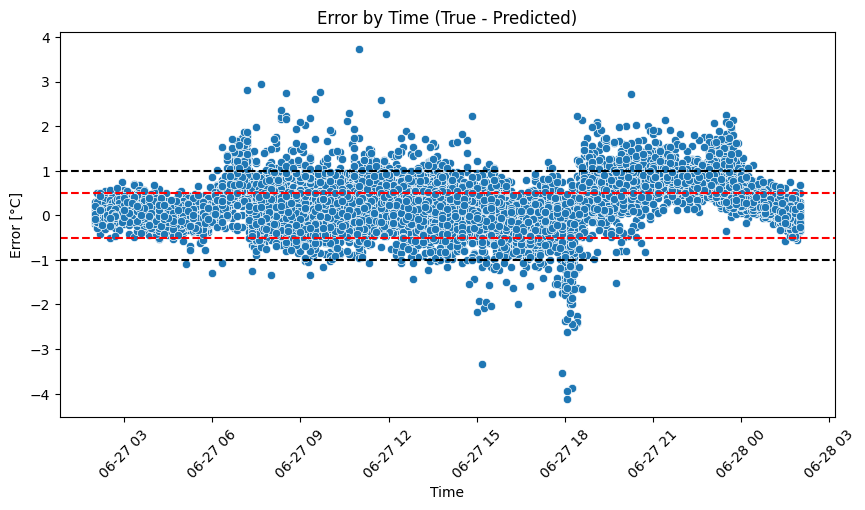

In [39]:
ax, fig = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(data=outputfile, x='datetime', y='Error')
ax.set(xlabel='Time', ylabel='Error [°C]', title='Error by Time (True - Predicted)')
plt.xticks(rotation=45)
#horizontal line at 0.5 and -0.5
ax.axhline(0.5, color='red', linestyle='--')
ax.axhline(-0.5, color='red', linestyle='--')
ax.axhline(1, color='black', linestyle='--')
ax.axhline(-1, color='black', linestyle='--')


### Analysis of Confidence Intervals

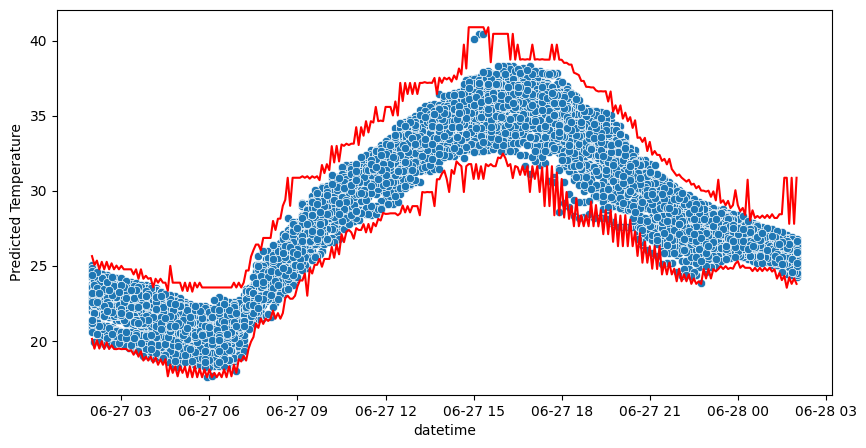

In [69]:
confidence_intervals = {'datetime': [], 'Upper Boundary': [], 'Lower Boundary': []}
for time in outputfile['datetime'].unique():
    confidence_intervals['datetime'].append(time)
    confidence_intervals['Upper Boundary'].append(outputfile[outputfile['datetime'] == time]['Upper Boundary'].max())
    confidence_intervals['Lower Boundary'].append(outputfile[outputfile['datetime'] == time]['Lower Boundary'].min())
confidence_intervals = pd.DataFrame(confidence_intervals)

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(data=outputfile, x='datetime', y='Predicted Temperature')
ax = sns.lineplot(data=confidence_intervals, x='datetime', y='Upper Boundary', color='red')
ax = sns.lineplot(data=confidence_intervals, x='datetime', y='Lower Boundary', color='red')

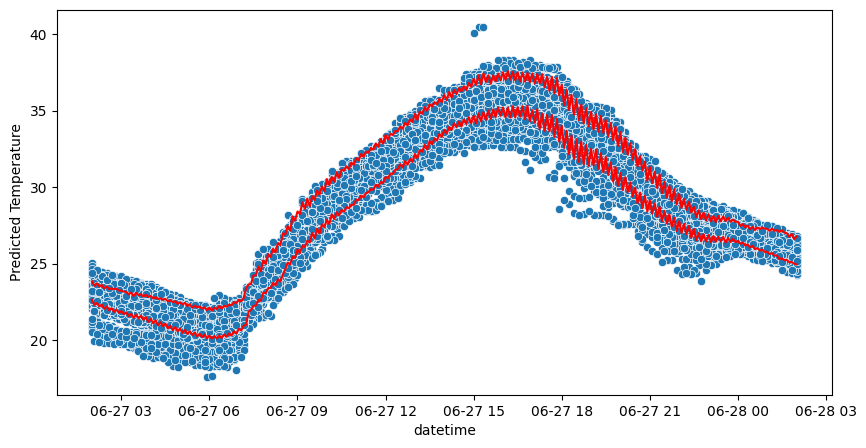

In [71]:
confidence_intervals = {'datetime': [], 'Upper Boundary': [], 'Lower Boundary': []}
for time in outputfile['datetime'].unique():
    confidence_intervals['datetime'].append(time)
    confidence_intervals['Upper Boundary'].append(outputfile[outputfile['datetime'] == time]['Upper Boundary'].mean())
    confidence_intervals['Lower Boundary'].append(outputfile[outputfile['datetime'] == time]['Lower Boundary'].mean())
confidence_intervals = pd.DataFrame(confidence_intervals)

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(data=outputfile, x='datetime', y='Predicted Temperature')
ax = sns.lineplot(data=confidence_intervals, x='datetime', y='Upper Boundary', color='red')
ax = sns.lineplot(data=confidence_intervals, x='datetime', y='Lower Boundary', color='red')